# **Projet conversion_data**

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [129]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [130]:
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

### Data **VIZ**



## Analyse de la variable country

In [131]:
df.country.value_counts()*100/df.country.value_counts().sum()

US         56.322581
China      24.225806
UK         15.322581
Germany     4.129032
Name: country, dtype: float64

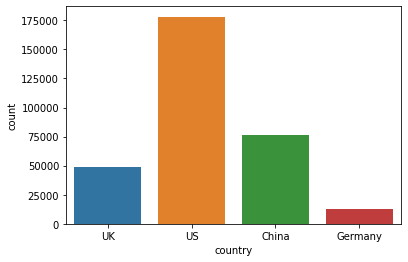

In [132]:
sns.countplot(df.country)

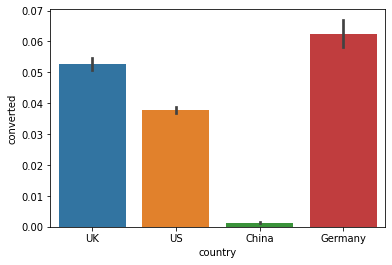

In [133]:
sns.barplot(x='country',y='converted',data=df)

Le box plot si dessous montre que la moyenne d'age pour chaque pays est tres similaire avec des quantiles quasi equivalents.
On observe notamment des valeurs aberrantes dont deux tres eleves que l'on supprimera pour l'étude. 

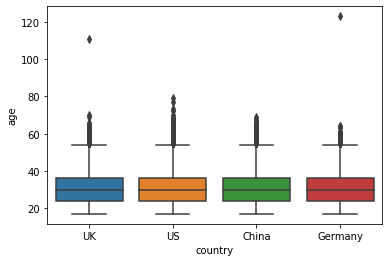

In [134]:
sns.boxplot(x="country",y="age",data=df)

## Analyse de la variable Age


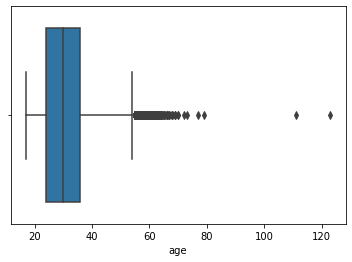

In [135]:
sns.boxplot(df['age'])

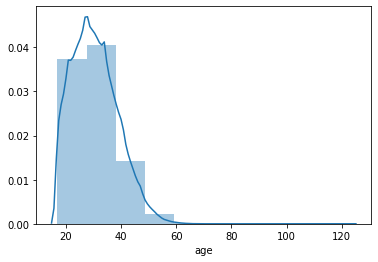

In [136]:
sns.distplot(df['age'], bins=10)

Suppression des valeurs aberrantes (age>90 ans) 

In [137]:
df=df[df.age<100]

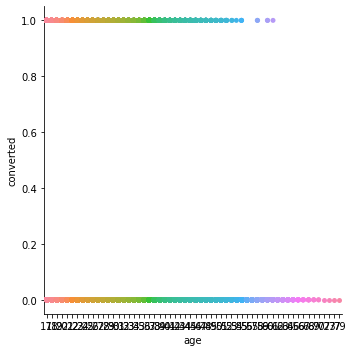

In [138]:
sns.catplot(x="age", y="converted", data=df)

## Analyse de la variable Source

On voit que la plusplart des gens viennent de la du SEO ensuite des publicités puis d'une source directe

In [139]:
df["source"].value_counts()/df["source"].value_counts().sum()

Seo       0.490323
Ads       0.280644
Direct    0.229034
Name: source, dtype: float64

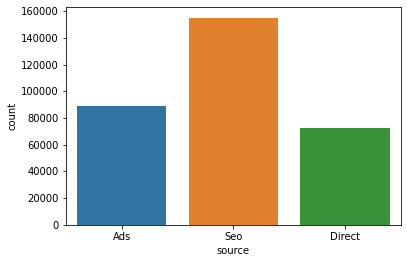

In [140]:
sns.countplot(df.source)

Ce sont par contre les personnes qui viennent des publicités qui convertisse le plus

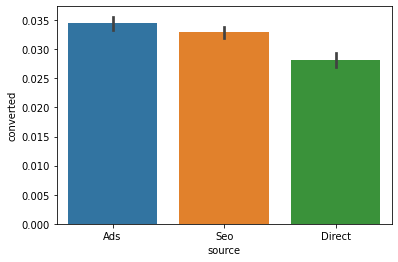

In [141]:
sns.barplot(x='source',y='converted',data=df)

## Analyse de la variable nouvel utiisateur


In [142]:
df.new_user.value_counts()/df.new_user.value_counts().sum()

1    0.685469
0    0.314531
Name: new_user, dtype: float64

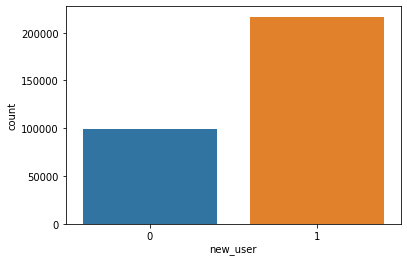

In [143]:
sns.countplot(df.new_user)

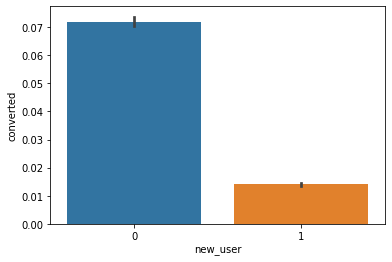

In [144]:
sns.barplot(x="new_user", y="converted",data=df)

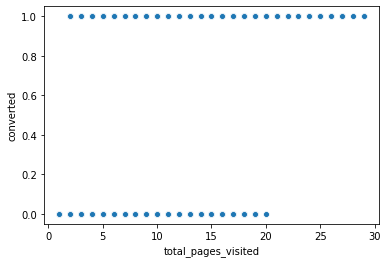

In [145]:
sns.scatterplot(x="total_pages_visited", y="converted", data=df)

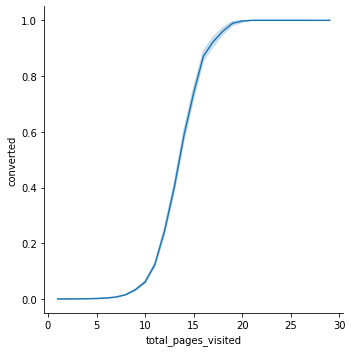

In [146]:
sns.relplot(x="total_pages_visited", y="converted", data=df, kind="line")

In [147]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [148]:
# Gestion des variables catégoriques 
X = pd.get_dummies(X, drop_first = True)

X

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [150]:
y_train.value_counts()/y_train.value_counts().sum()

0    0.96775
1    0.03225
Name: converted, dtype: float64

In [151]:
y_test.value_counts()/y_test.value_counts().sum()

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [152]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
classifier.score(X_train, y_train)

0.9862448766171336

In [155]:
classifier.score(X_test, y_test)

0.9860594560404807

In [156]:
from sklearn.model_selection import cross_val_score
moy = cross_val_score(classifier,X_train, y_train, cv=10).mean()
moy

0.9862237908482505

In [157]:
std = cross_val_score(classifier,X_train, y_train, cv=10).std()
std

0.0005540499762879237

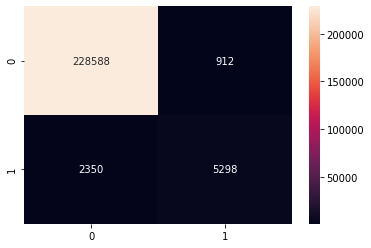

In [158]:
from sklearn.metrics import confusion_matrix
y_pred_train = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt="d")

In [159]:
y_pred_test = classifier.predict(X_test)

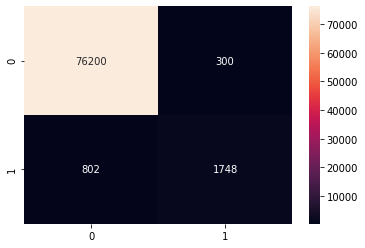

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

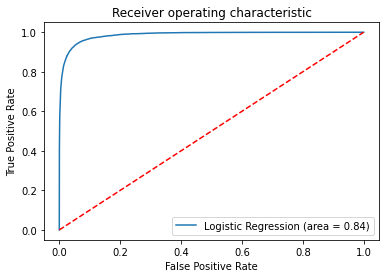

In [161]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, classifier.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict_proba(X_train)[:,1]) 
"""on séléctionne la colonne 1 de predict proba car on a une colonne par classe de y
et qu'on a besoin e P(y=1)"""
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [163]:
rf.score(X_train,y_train)

0.9884797679086478

In [164]:
rf.score(X_test,y_test)

0.9840101201771031

In [165]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [166]:
rf.feature_importances_

array([0.10769461, 0.03843365, 0.80942743, 0.0098541 , 0.01339985,
       0.01242992, 0.0040595 , 0.00470094])

In [167]:
# Gestion des variables catégoriques 
X2 = pd.get_dummies(df.iloc[:,:-1], drop_first = True)
X2

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [171]:
feature_importance=pd.DataFrame({"features": X2.columns, "score": rf.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance

,features,score
2,total_pages_visited,0.809427
0,age,0.107695
1,new_user,0.038434
4,country_UK,0.013400
5,country_US,0.012430
3,country_Germany,0.009854
7,source_Seo,0.004701
6,source_Direct,0.004059


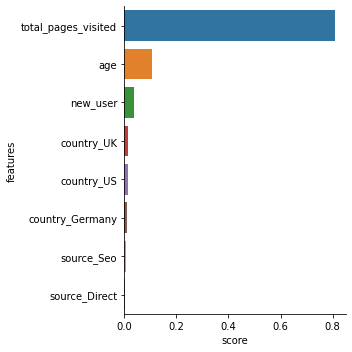

In [172]:
sns.catplot(x="score",y="features", data=feature_importance, kind="bar" )

Finalement s'apperçoit que le random forest a un score un tout petit peu meilleur que l'algorithme linéaire logistique.

La variable qui permet de prédire au mieux la conversion est le nombre de page visité plus celui ci est élevé plus on observe de conversion.

SI l'on devait donner des recommandations à l'equipe de marketing pour augmenter le taux de conrsion est donc augmenter les revenues de la société on leur indiquerait:

- Créer un système d'alerte afin de d'être notifier lorsqu'une personne visite plusieurs fois une page du site, afin de l'attirer à consommer par de la publicité par mail ou un un système de notification par exemple...

- On doit notamment conseiller le service de marketing de trouver le moyens d'attirer les jeunes qui ont entre 20 et 40 ans.

- Le taux de convertion est plutot élevé en occident plutot qu'en chine, on peut peut etre se dire que c'est un problème de culture, ce serait plus approprié d'aborder un marché occidentale.




